In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import os
import json
import re
from keras.models import load_model

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# read data from csv file

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [3]:
file = 'fake.csv'
df = pd.read_csv(file)

In [4]:
# unqiue types 
u_type = df['type'].unique()
print(len(u_type))

8


In [5]:
# count in each type 
count_type = df['type'].value_counts()
print(count_type)

bs            11492
bias            443
conspiracy      430
hate            246
satire          146
state           121
junksci         102
fake             19
Name: type, dtype: int64


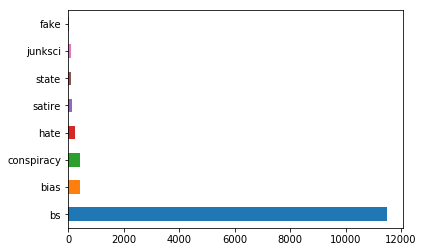

In [6]:
# draw the count result
count_type.plot(kind='barh')

# which website has fake news

In [7]:
fake_news_df = df[df['type'] != 'bs']
fake_news_website = fake_news_df['site_url'].unique()

In [8]:
fake_news_df.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [9]:
fake_news_website = fake_news_website.tolist()

In [10]:
print(type(fake_news_website))
print(len(fake_news_website))

<class 'list'>
27


In [11]:
# get the fake news website and title of these fake news
fake_news_title = fake_news_df[['text']]

In [12]:
fake_news_title.head()
print(len(fake_news_title))

1507


# add news content into a list 

In [13]:
fake_news_content_from_csv = fake_news_title['text'].tolist()


In [14]:
print(fake_news_content_from_csv[0])

Print They should pay all the back all the money plus interest. The entire family and everyone who came in with them need to be deported asap. Why did it take two years to bust them? 
Here we go again …another group stealing from the government and taxpayers! A group of Somalis stole over four million in government benefits over just 10 months! 
We’ve reported on numerous cases like this one where the Muslim refugees/immigrants commit fraud by scamming our system…It’s way out of control! More Related


In [15]:
fake_news_content_from_csv_str = []
for i in range(0,len(fake_news_content_from_csv)):
    #print(type(fake_news_content_from_csv[i]))
    if(isinstance(fake_news_content_from_csv[i], str)):
        fake_news_content_from_csv_str.append(fake_news_content_from_csv[i])
    

In [16]:
a = fake_news_content_from_csv[1111]
new_content_token_csv = re.sub(r'[^\w]', ' ', a).lower().split()

In [17]:
print(new_content_token_csv) #some of the news_content_token_csv is float type

['breitbart', 'october', '26', '2016', 'a', 'syrian', 'christian', 'mother', 'shared', 'her', 'story', 'of', 'escaping', 'the', 'islamic', 'state', 'terrorist', 'group', 'in', 'a', 'suburb', 'of', 'damascus', 'while', 'losing', 'her', 'son', 'george', 'after', 'he', 'refused', 'to', 'identify', 'himself', 'to', 'the', 'terrorists', 'by', 'a', 'muslim', 'name', 'the', 'woman', 'alice', 'assaf', 'said', 'that', 'she', 'had', 'heard', 'that', 'her', 'son', 'who', 'was', 'beaten', 'and', 'shot', 'to', 'death', 'was', 'spared', 'a', 'much', 'worse', 'fate', 'being', 'baked', 'in', 'the', 'ovens', 'of', 'the', 'local', 'bakery', 'or', 'kneaded', 'to', 'death', 'in', 'the', 'bakery', 's', 'industrial', 'sized', 'mixer', 'assaf', 'told', 'her', 'story', 'to', 'roads', 'of', 'success', 'a', 'human', 'rights', 'ngo', 'with', 'a', 'focus', 'on', 'the', 'rights', 'of', 'women', 'and', 'christians', 'in', 'the', 'middle', 'east', 'the', 'group', 'has', 'provided', 'testimony', 'of', 'the', 'plight'

In [18]:
# clean the data
news_content_all_csv= []
for i in range (0,len(fake_news_content_from_csv_str)):
    new_content_token_csv = re.sub(r'[^\w]', ' ', fake_news_content_from_csv_str[i]).lower().split()
    new_content_token_csv = [ word for word in new_content_token_csv if word not in stopwords.words('english')]
    news_content_all_csv.append(new_content_token_csv)


In [19]:
print(type(fake_news_content_from_csv))
print(len(fake_news_content_from_csv))
print(type(fake_news_content_from_csv[0]))

<class 'list'>
1507
<class 'str'>


# extract news content from csv files

In [20]:
print(news_content_all_csv[0])
print(news_content_all_csv[1333])

['print', 'pay', 'back', 'money', 'plus', 'interest', 'entire', 'family', 'everyone', 'came', 'need', 'deported', 'asap', 'take', 'two', 'years', 'bust', 'go', 'another', 'group', 'stealing', 'government', 'taxpayers', 'group', 'somalis', 'stole', 'four', 'million', 'government', 'benefits', '10', 'months', 'reported', 'numerous', 'cases', 'like', 'one', 'muslim', 'refugees', 'immigrants', 'commit', 'fraud', 'scamming', 'system', 'way', 'control', 'related']
['josh', 'stop', 'talking', 'sit', 'american', 'people', 'fed', 'spewing', 'lies', 'coming', 'administration', 'destruction', 'country', 'come', 'end', 'people', 'spoken', 'time', 'change', 'long', 'time', 'coming', 'trump', 'would', 'say', 'time', 'drain', 'swamp']


In [21]:
# change to a list of string
news_content_string_csv = [' '.join(x) for x in news_content_all_csv]

In [22]:
print(news_content_string_csv[0:2])

['print pay back money plus interest entire family everyone came need deported asap take two years bust go another group stealing government taxpayers group somalis stole four million government benefits 10 months reported numerous cases like one muslim refugees immigrants commit fraud scamming system way control related', 'attorney general loretta lynch plead fifth barracuda brigade 2016 10 28 print administration blocking congressional probe cash payments iran course needs plead 5th either recall refuses answer plain deflects question straight corruption finest 100percentfedup com talk covering ass loretta lynch plead fifth avoid incriminating payments iran corrupt core attorney general loretta lynch declining comply investigation leading members congress obama administration secret efforts send iran 1 7 billion cash earlier year prompting accusations lynch pleaded fifth amendment avoid incriminating payments according lawmakers communications exclusively obtained washington free bea

# label the news from csv files, all news are fake

In [23]:
# create a list to hold the response variable fake and real (1 and 0), the first 91 is fake and last 91 is real
fake_y_csv = [1] * len(news_content_string_csv)

# one hot encode the output variable
news_Y_csv = np.array (fake_y_csv)
print(type(news_Y_csv))

<class 'numpy.ndarray'>


In [24]:
print(news_Y_csv.shape)

(1461,)


# read all json files from different folder

In [26]:
# read real
myList = []
directory = 'BuzzFeed/FakeNewsContent'
file_names = os.listdir(directory)
cleaned_file_name = [f for f in file_names if f.endswith('.json')]
#for i, filename in zip(range(1),cleaned_file_name):
for filename in cleaned_file_name:   
    with open(os.path.join(directory,filename),'r',encoding="utf8") as myfile:
        #print(filename)
        data = json.load(myfile) 
        myList.append(data)
        
# read fake
myList_real = []
my_df_real  = pd.DataFrame()
directory_real = 'BuzzFeed/RealNewsContent'
file_names_real = os.listdir(directory_real)
cleaned_file_name_real = [f for f in file_names_real if f.endswith('.json')]
#for i, filename in zip(range(1),cleaned_file_name):
for filename in cleaned_file_name_real:   
    with open(os.path.join(directory_real,filename),'r',encoding="utf8") as myfile:
        #print(filename)
        data = json.load(myfile) 
        myList_real.append(data)
        
# read fake news
myList_fake = []
my_df  = pd.DataFrame()
directory_fake = 'PolitiFact/FakeNewsContent'
file_names_fake = os.listdir(directory_fake)
cleaned_file_name_fake = [f for f in file_names_fake if f.endswith('.json')]
#for i, filename in zip(range(1),cleaned_file_name):
for filename in cleaned_file_name_fake:   
    with open(os.path.join(directory_fake,filename),'r',encoding="utf8") as myfile:
        #print(filename)
        data = json.load(myfile) 
        myList_fake.append(data)
        
# read good news
myList_real_p = []
directory_real_p = 'PolitiFact/RealNewsContent'
file_names_real_p = os.listdir(directory_real_p)
cleaned_file_name_real_p = [f for f in file_names_real_p if f.endswith('.json')]
#for i, filename in zip(range(1),cleaned_file_name):
for filename in cleaned_file_name_real_p:   
    with open(os.path.join(directory_real_p,filename),'r',encoding="utf8") as myfile:
        #print(filename)
        data = json.load(myfile) 
        myList_real_p.append(data)

# append all file together (fake and real) from both json file

In [27]:
news_list = myList + myList_fake + myList_real + myList_real_p 

In [39]:
print(len(news_list))
print(len(myList))
print(len(myList_fake))

422
91
120


# extract news content from json file

In [29]:

# news_content_all has already delete the stopwards.words
import re 
news_content_all = []
for i in range (0,len(news_list)): # i from 0 to 90
    #print(news_dict)
    per_new_text= []
    news_dict = news_list[i]
    news_content = news_dict['text']
    new_content_token = re.sub(r'[^\w]', ' ', news_content).lower().split()
    new_content_token = [ word for word in new_content_token if word not in stopwords.words('english')]
    news_content_all.append(new_content_token)


In [30]:

print(len(news_content_all))
print(len(news_content_all[0]))
print(len(news_content_all[90]))
print("the type of news_content_all is ", type(news_content_all))
print("the type fo news content all [0] is", type(news_content_all[0]))
print(news_content_all[0][0])
# this news_content_all is a list of list 


422
232
160
the type of news_content_all is  <class 'list'>
the type fo news content all [0] is <class 'list'>
people


In [31]:
# make a list of list to a list of string, so we can use in the Tokenizer part
news_content_string = [' '.join(x) for x in news_content_all]

In [32]:
print(type(news_content_string))
print(news_content_string[0])

<class 'list'>
people noticed something odd hillary outfit debate last night lot could discussed last night debate like unfair debate moderator asking questions help hillary main concern right one thing baffled many hillary appear usually stupid coughing self ready answers detailed facts almost bizarre sputter reach glass water odd everyone grandma talking latest question swirling around social media pictures appeared show hillary kind flesh colored device embedded inside ear earpiece wearing something fashionable old ladies twitter may figured answer see certainly first time hillary use device help think could trick light shadows puffy zipper perhaps hillary actually hiding cough prevention machine hideous feminist pantsuit hillary clinton campaign fervently denying wearing earpiece 101 things young adults know sir john hawkins john hawkins book 101 things young adults know filled lessons newly minted adults need order get life gleaned lifetime trial error writing hawkins provides adv

In [33]:
# another way to create news_content all, a list of string

# count the word frequency in the entire news and save all words we want to keep , delete words that we think is not important

In [34]:
# news_content_string is a list of string, that are used for embedding 
# news_content_all is a list of list 
# make nested list to flat list and then count frequency 
from collections import Counter
import itertools
flatList = list(itertools.chain.from_iterable(news_content_all))
counts = Counter(flatList)


In [35]:
print(type(counts))
print(len(counts))

<class 'collections.Counter'>
15605


In [38]:
count = 0
for key, cnts in list(counts.items()):   
    if cnts > 5:
        count = count + 1
print(count) 

'''
3798 word frequent is greater than 5. 
'''

3798


'\n3798 word frequent is greater than 5. \n'

# create response variable y fake is 1 and real is 0, y is a list

In [52]:
# create a list to hold the response variable fake and real (1 and 0), the first 91 is fake and last 91 is real
fake_y = [1] * (91 + 120)
real_y = [0]* (91+120)
fake_real_label = []
fake_real_label.extend(fake_y)
fake_real_label.extend(real_y)
print(len(fake_real_label))
print(type(fake_real_label))

# one hot encode the output variable
news_Y = np.array (fake_real_label)
news_Y = np.concatenate([news_Y_csv,news_Y])
#news_Y.extend(news_Y_csv)
print(type(news_Y))
print(news_Y.shape)

422
<class 'list'>
<class 'numpy.ndarray'>
(1883,)


In [53]:
# add news_content_string and news_content_string_csv together, label should be all fake and real
docs = news_content_string_csv + news_content_string 

In [54]:
print(docs[0])
print(len(news_content_string_csv))


print pay back money plus interest entire family everyone came need deported asap take two years bust go another group stealing government taxpayers group somalis stole four million government benefits 10 months reported numerous cases like one muslim refugees immigrants commit fraud scamming system way control related
1461


In [42]:
print("length of news:", len(docs))
print("type of news:", type(docs))

print("length of label:", len(news_Y))
print("type of news:", type(news_Y))

length of news: 1883
type of news: <class 'list'>
length of label: 1883
type of news: <class 'numpy.ndarray'>


# check which word is most often appears in fake or real news

In [ ]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [84]:
# in fake news or real news which word count is greater than 200, appear more than 300 times
# the length of fake news should be 1461 + 211 = 1672
#flatList_fake = list(itertools.chain.from_iterable(docs[0:1671]))
flatList_fake = docs[0:1671]
counts_fake = dict()
for i in range (0,len(flatList_fake)):
    words_fake = flatList_fake[i].split()
    for word in words_fake:
        if word in counts_fake:
            counts_fake[word] += 1
        else:
            counts_fake[word] =1
# sort counts_fake 
fake_sorted_keys = sorted(counts_fake, key=counts_fake.get, reverse=True)
for r in fake_sorted_keys:
    if(counts_fake[r] > 1950):
        print (r, counts_fake[r])

trump 3455
clinton 2962
one 1965


In [81]:
# in real news which word count is greater than 200, appear more than 300 times
# the length of real news should be 211
flatList_real = docs[1672:1883]
counts_real = dict()
for i in range (0,len(flatList_real)):
    words_real = flatList_real[i].split()
    for word in words_real:
        if word in counts_real:
            counts_real[word] += 1
        else:
            counts_real[word] =1
# sort counts_fake 
real_sorted_keys = sorted(counts_real, key=counts_real.get, reverse=True)
for r in real_sorted_keys:
    if(counts_real[r] > 500):
        print (r, counts_real[r])

trump 1338
said 759
clinton 607


# import package about keras

In [85]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding

# create the tokenizer Part and padding words to integer and then to vector

In [86]:
# create the tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(docs)


In [87]:
news_embbeding  = t.texts_to_sequences(docs)

'''
# 把词转换为编号，词的编号根据词频设定，频率越大，编号越小
'''

'\n# 把词转换为编号，词的编号根据词频设定，频率越大，编号越小\n'

In [88]:
print(type(news_embbeding))
print(len(news_embbeding[0]))
print(type(news_embbeding[0]))
print(news_embbeding[1])

<class 'list'>
47
<class 'list'>
[535, 197, 2573, 871, 8571, 3484, 13791, 6857, 18, 101, 665, 946, 255, 3707, 1044, 2404, 1295, 2694, 348, 261, 415, 8571, 9428, 334, 3942, 3367, 657, 3277, 10502, 251, 1296, 827, 10503, 11875, 22, 436, 3032, 2057, 2573, 871, 8571, 3484, 920, 7891, 2694, 348, 993, 2167, 535, 197, 2573, 871, 6079, 5472, 153, 745, 393, 424, 20, 255, 728, 631, 1269, 348, 88, 361, 746, 1295, 401, 62, 4582, 2217, 871, 5241, 3484, 1849, 920, 7891, 2694, 72, 2266, 1906, 3943, 2624, 129, 131, 6080, 1143, 3821, 2058, 1045, 7892, 1238, 1297, 10504, 1045, 16551, 2948, 2819, 871, 73, 1057, 605, 1295, 3708, 348, 1672, 2104, 570, 888, 689, 2218, 535, 197, 1628, 1205, 1553, 871, 2267, 3033, 657, 605, 6081, 2266, 5756, 1629, 10505, 1415, 1295, 3708, 4402, 7334, 438, 2508, 11876, 233, 34, 8572, 348, 689, 535, 197, 172, 5473, 1320, 280, 871, 2105, 2018, 8571, 3484, 2949, 2268, 6082, 1079, 550, 1907, 1295, 33, 6858, 19, 8573, 439, 2058, 10504, 304, 658, 695, 499, 871, 403]


In [89]:
max_length = 426
padded_docs = pad_sequences(news_embbeding, maxlen=max_length) 


In [90]:
padded_docs

array([[    0,     0,     0, ...,    36,   211,   403],
       [    0,     0,     0, ...,   499,   871,   403],
       [    0,     0,     0, ...,  8575,  1058,   403],
       ...,
       [    0,     0,     0, ...,  3268,     2,   843],
       [    0,     0,     0, ...,  5586,  1878,  1501],
       [33878,  1573,  3594, ...,  1180,  2446,  1434]], dtype=int32)

In [49]:
'''
pad_sequences is a function that can make different length of news become same length, if the length of a news exceed 
the maxlen, then this function will make the words that exceed max length to 0 and if the length of a news is less than
the maxlen, then this function will make the different length of words between current length and max length to 0. 

So, how to set the max length? how to determine what element should be left or delete? 

before doing pad_sequences, we decide to count frequency of words in all news then rank them. Save the words with 
highest and useful words. (except I , am , and, my)

Saving the words that we want to keep to a new trainX and redo the new embedding. 


By the way, the embedding part is translate each word to a unqiue integer. 
'''

'\npad_sequences is a function that can make different length of news become same length, if the length of a news exceed \nthe maxlen, then this function will make the words that exceed max length to 0 and if the length of a news is less than\nthe maxlen, then this function will make the different length of words between current length and max length to 0. \n\nSo, how to set the max length? how to determine what element should be left or delete? \n\nbefore doing pad_sequences, we decide to count frequency of words in all news then rank them. Save the words with \nhighest and useful words. (except I , am , and, my)\n\nSaving the words that we want to keep to a new trainX and redo the new embedding. \n\n\nBy the way, the embedding part is translate each word to a unqiue integer. \n'

In [91]:
# check how many words appears more than 5 times, 
count = 0
for key, cnts in list(counts.items()):   
    if cnts > 30:
        count = count + 1
print(count) 

# greater than 20, 1213 words
# greater than 30, 795 words
# greater than 50, 426 words

795


In [92]:
# pad_sequences process based on rank
# Example to sort the first element
e1 = news_embbeding[0]
print(sorted(e1,key = int))


[4, 9, 35, 36, 38, 49, 50, 50, 54, 74, 83, 94, 98, 101, 126, 128, 141, 141, 179, 185, 211, 220, 244, 282, 317, 354, 392, 403, 569, 616, 810, 870, 912, 933, 946, 992, 1394, 1601, 2572, 3594, 4236, 4401, 7890, 9427, 16549, 16550, 21669]


In [93]:
length = [len(x) for x in news_embbeding]
import matplotlib.pyplot as plt
%matplotlib inline



(array([1.511e+03, 2.790e+02, 6.500e+01, 1.500e+01, 5.000e+00, 2.000e+00,
        1.000e+00, 4.000e+00, 0.000e+00, 1.000e+00]),
 array([   0. ,  417.2,  834.4, 1251.6, 1668.8, 2086. , 2503.2, 2920.4,
        3337.6, 3754.8, 4172. ]),
 <a list of 10 Patch objects>)

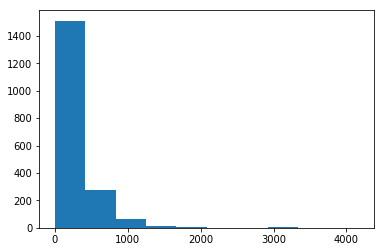

In [94]:
plt.hist(length)

In [95]:
length = sorted(length)
length

index = int(len(length)* 0.97) # 1171 cover 97% of words
max_length = length[index]
print(max_length)

987


In [96]:

padded_docs = pad_sequences(news_embbeding, maxlen=max_length, padding = 'post') 

# choose save the words which frequent greater than 50?
# padding: String, 'pre' or 'post': pad either before or after each sequence.

In [97]:
print(padded_docs[0:10])

[[ 946  392   49 ...    0    0    0]
 [ 535  197 2573 ...    0    0    0]
 [ 576   19  464 ...    0    0    0]
 ...
 [ 653 4087 1110 ...    0    0    0]
 [3827    3 1977 ...    0    0    0]
 [  66    5 1630 ...    0    0    0]]


In [98]:
len(padded_docs)

1883

# use glove to do word embedding

In [100]:
# load the whole embedding into memory
from numpy import array
from numpy import asarray
embeddings_index = dict()
file = "glove/glove.6B.50d.txt"
f = open(file)
for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [101]:
'''
Next, we need to create a matrix of one embedding for each word in the training dataset. 
We can do that by enumerating all unique words in the Tokenizer.word_index and locating the embedding weight 
vector from the loaded GloVe embedding.
The result is a matrix of weights only for words we will see during training.
'''
vocab_size = len(t.word_index) + 1
from numpy import zeros
embedding_matrix = zeros((vocab_size, 50))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [102]:
print(len(t.word_index)) #  how many words in the entire words
print(type(t.word_index))

33893
<class 'dict'>


In [103]:
print(embedding_matrix)
print(vocab_size)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.45769     0.85191     0.31097999 ... -0.74225998  0.77052999
   0.26394001]
 [ 0.23158     0.69963998  0.43878001 ...  0.68463999 -0.43252999
   0.75606   ]
 ...
 [ 0.43803999 -0.28209999  0.76776999 ...  1.10179996  0.51640999
   0.37685999]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.0038993  -0.37799999  0.22160999 ...  0.79258001  0.72994
   0.21297   ]]
33894


In [104]:
#print(t.word_index)

value = [v for key,v in t.word_index.items()]
value.count(1)

1

# using training data to train model

# split training , validation and testing data

In [105]:
print(len(padded_docs))
print(len(news_Y))

1883
1883


In [118]:
from sklearn.model_selection import train_test_split
validation_size = 0.2
seed = 4
# split data into train, test and validation

train_X, test_X = train_test_split(padded_docs,  test_size=validation_size, random_state=seed)
train_y, test_y = train_test_split(news_Y,  test_size=validation_size, random_state=seed)

train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.2, random_state=seed)

In [119]:
#print(len(train_X[0]))
#print(len(train_X[1]))
print('the training x is', len(train_X))
print('the training y is', len(train_y))
print('the testing x is', len(test_X))
print('the testing y is', len(test_y))
print('the validation x is', len(val_X))
print('the validation x is', len(val_y))


print(train_y[0:20])
print(test_X[0:20])
print(val_X[0:20])

the training x is 1204
the training y is 1204
the testing x is 377
the testing y is 377
the validation x is 302
the validation x is 302
[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[  301    47   744 ...     0     0     0]
 [ 2189  1997   418 ...     0     0     0]
 [  150   132    18 ...     0     0     0]
 ...
 [ 2839 12240   796 ...     0     0     0]
 [   82  1165  7558 ...     0     0     0]
 [  953   422  2334 ...     0     0     0]]
[[  446 14057    47 ...     0     0     0]
 [   15     1   127 ...     0     0     0]
 [  593   581   593 ...     0     0     0]
 ...
 [ 2013  4790  4398 ...     0     0     0]
 [15301   333   563 ...     0     0     0]
 [  408 31949   437 ...     0     0     0]]


<font color = 'red'> Let's see imbalanced stats in training set </font>

In [120]:
fake_news = sum(train_y == 1)
real_news = sum(train_y == 0)
class_imbalanced_ratio = real_news/fake_news
print('fake news {} real news {}'.format(fake_news, real_news))
print('class imbalanced ratio {}'.format(class_imbalanced_ratio))
print('percent fake news {}. Need to beat this accuracy'.format(fake_news/(fake_news+ real_news)))

fake news 1071 real news 133
class imbalanced ratio 0.12418300653594772
percent fake news 0.8895348837209303. Need to beat this accuracy


<font color = 'red'> In test set imbalnced stats </font>

In [121]:
fake_news = sum(test_y == 1)
real_news = sum(test_y == 0)
class_imbalanced_ratio_test = real_news/fake_news
print('fake news {} real news {}'.format(fake_news, real_news))
print('class imbalanced ratio {}'.format(class_imbalanced_ratio_test))
print('percent fake news {} test.'.format(fake_news/(fake_news+ real_news)))

fake news 331 real news 46
class imbalanced ratio 0.13897280966767372
percent fake news 0.8779840848806366 test.


In [122]:
fake_news = sum(val_y == 1)
real_news = sum(val_y == 0)
class_imbalanced_ratio_test = real_news/fake_news
print('fake news {} real news {}'.format(fake_news, real_news))
print('class imbalanced ratio {}'.format(class_imbalanced_ratio_test))
print('percent fake news {} validation.'.format(fake_news/(fake_news+ real_news)))

fake news 270 real news 32
class imbalanced ratio 0.11851851851851852
percent fake news 0.8940397350993378 validation.


# solve data imbalance problem -- Oversampling

In [67]:
'''
from imblearn.over_sampling import SMOTE

print("Number transactions X_train dataset: ", train_X.shape)
print("Number transactions y_train dataset: ", train_y.shape)
print("Number transactions X_test dataset: ", test_X.shape)
print("Number transactions y_test dataset: ", test_y.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(train_y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(train_y==0)))

# oversample on training set
sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_sample(train_X, train_y)

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
'''

'\nfrom imblearn.over_sampling import SMOTE\n\nprint("Number transactions X_train dataset: ", train_X.shape)\nprint("Number transactions y_train dataset: ", train_y.shape)\nprint("Number transactions X_test dataset: ", test_X.shape)\nprint("Number transactions y_test dataset: ", test_y.shape)\n\nprint("Before OverSampling, counts of label \'1\': {}".format(sum(train_y==1)))\nprint("Before OverSampling, counts of label \'0\': {} \n".format(sum(train_y==0)))\n\n# oversample on training set\nsm = SMOTE(random_state=12)\nx_train_res, y_train_res = sm.fit_sample(train_X, train_y)\n\nprint("After OverSampling, counts of label \'1\': {}".format(sum(y_train_res==1)))\nprint("After OverSampling, counts of label \'0\': {}".format(sum(y_train_res==0)))\n'

# How to use tensorflow to handle class imbalance? (88% of data are fake) -- the mothod below looks like dosen't works on LSTM
## add class weights to the loss function

In [123]:
from keras import backend as K
def weighted_binary_crossentropy(class_weights = [1.0, 1.0]):
    """
    A weighted version of binary
    
    Variables:
        weights: [class one weight, class zero weight]
    
    Usage:

    """
    
    class_weights = class_weights
        
    def loss(y_true, y_pred):
        loss = -(class_weights[0] * y_true * K.log(y_pred) + class_weights[1] * (1.0 - y_true) * K.log(1.0 - y_pred))
        print(loss.shape)
        loss = K.sum(loss, -1)
        print(loss.shape)
        return loss
    
    return loss

# Model

In [125]:
from keras import  optimizers
model = Sequential()
# add embedding layers
model.add(Embedding(vocab_size, 50,weights=[embedding_matrix], input_length=max_length)) # length of dictionary, dim output

layer = model.layers[0]
layer.trainable = False

#batchSize = 128
batchSize = 1  # should be 128

# less representative class should have more weight
weights = [.12, .88]


model.add(LSTM(64, input_shape =(None,50)))  #should be 40
#model.add(LSTM(96))
model.add(Dense(1, activation='sigmoid'))
opt= optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss=weighted_binary_crossentropy(weights), optimizer=opt, metrics=['accuracy'])


(?, ?)
(?,)


# fit model and save model

In [127]:
#model.fit(train_X, train_y, batch_size=batchSize, validation_data= (test_X, test_y), epochs=50)
model.fit(train_X, train_y, batch_size=batchSize, validation_data= (val_X, val_y), epochs=5)
model.save('finalModel')

Train on 1204 samples, validate on 302 samples
Epoch 1/5
1204/1204 [==============================] - 808s 671ms/step - loss: 0.1459 - acc: 0.5017 - val_loss: 0.1389 - val_acc: 0.8907
Epoch 2/5
1204/1204 [==============================] - 806s 669ms/step - loss: 0.1418 - acc: 0.6146 - val_loss: 0.1409 - val_acc: 0.1093
Epoch 3/5
1204/1204 [==============================] - 833s 692ms/step - loss: 0.1410 - acc: 0.6221 - val_loss: 0.1394 - val_acc: 0.8907
Epoch 4/5
1204/1204 [==============================] - 807s 670ms/step - loss: 0.1403 - acc: 0.5922 - val_loss: 0.1396 - val_acc: 0.8907
Epoch 5/5
1204/1204 [==============================] - 806s 669ms/step - loss: 0.1402 - acc: 0.7027 - val_loss: 0.1411 - val_acc: 0.8940


{'val_loss': [0.13886194260457888, 0.14093354978407455, 0.1393883954980318, 0.13957213926196887, 0.14111286731103792], 'val_acc': [0.890728476821192, 0.10927152317880795, 0.890728476821192, 0.890728476821192, 0.8940397350993378], 'loss': [0.14593682506098876, 0.14182166073415614, 0.14102430114572082, 0.14031633840675817, 0.1401643676565731], 'acc': [0.5016611295681063, 0.6146179401993356, 0.622093023255814, 0.5921926910299004, 0.7026578073089701]}


Text(0.5,0.98,'test accuracy VS validation accruacy')

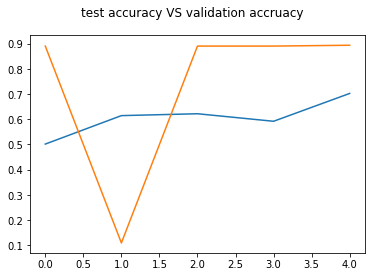

In [183]:
# draw graph of train accurancy vs val accurancy, train loss vs val loss
print(model.history.history)
acc = model.history.history['acc']
val_acc = model.history.history['val_acc']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(acc)
plt.plot(val_acc)
fig.suptitle('test accuracy VS validation accruacy')

Text(0.5,0.98,'test loss VS validation loss')

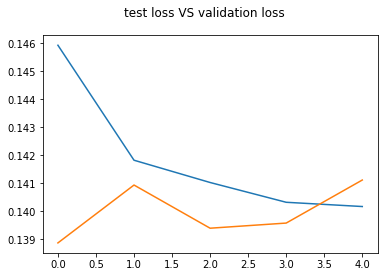

In [184]:
%matplotlib inline
fig = plt.figure()
plt.plot(loss)
plt.plot(val_loss)
fig.suptitle('test loss VS validation loss')

In [142]:
# use test set to calculate the accuracy on test data. 
#Include figures of confusion matrix in  report too.
loss, accuracy = model.evaluate(test_X, test_y, verbose=0)
print('Accuracy: %f' % (accuracy))
print('Loss: %f' % (loss))

Accuracy: 0.883289
Loss: 0.142803


In [144]:
# predict the y value of test data
pred_y = model.predict(test_X)
pred_y = (pred_y > 0.5)

In [145]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, pred_y)
print(cm)

# accurancy
a = (3+330)/(1+43+3+330)
a
# same with the accurancy get from model.evaluate

[[  3  43]
 [  1 330]]


0.883289124668435

# read the url and make it to vector

In [146]:
# import the necessary packages
from keras.applications import ResNet50
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils
from PIL import Image
import numpy as np
import flask
import io
import requests
from bs4 import BeautifulSoup

In [147]:
url = 'https://www.bbc.com/news/world-middle-east-45128367'

page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
soup.prettify()

table = soup.find("div", {"class":"story-body__inner"}).findAll('p')


article_text = ''
for element in table:
    article_text += ''.join(element.findAll(text = True))

article_text = re.sub(r'[^\w]', ' ', article_text)
article_text 

'At least 29 children have been killed and 30 wounded in a Saudi led coalition air strike in Yemen  the International Committee of the Red Cross says The children were travelling on a bus that was hit at a market in Dahyan  in the northern province of Saada  The health ministry run by the rebel Houthi movement put the death toll at 43  and said 61 people were wounded  The coalition  which is backing Yemen s government in a war with the Houthis  said its actions were  legitimate  It insists it never deliberately targets civilians  but human rights groups have accused it of bombing markets  schools  hospitals and residential areas Meanwhile the new UN special envoy to Yemen  former British diplomat Martin Griffiths  is planning to invite the warring parties to Geneva in September to discuss a framework for negotiations He told the BBC s Lyse Doucet that if the conflict is left unresolved  Yemen could collapse and the international community could be looking at  Syria plus  in the years t

In [ ]:
# fit the tokenizer on the documents
#t.fit_on_texts(article_text)


In [148]:
text_news_embbeding = t.texts_to_sequences(article_text)

padded_docs_p = pad_sequences(text_news_embbeding, maxlen=max_length) 
    
padded_docs_p = pad_sequences(text_news_embbeding, maxlen=987, padding = 'post') 
    

In [149]:
print(train_X.shape)
print(padded_docs_p[0:10])


(1204, 987)
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [125   0   0 ...   0   0   0]]


In [160]:
#model = load_model('finalModel')

preds = model.predict(padded_docs_p) # input is the sequence of the text 

In [161]:
preds  # the result is fake

array([[0.5382989],
       [0.5382989],
       [0.5382989],
       ...,
       [0.5382989],
       [0.5382989],
       [0.5382989]], dtype=float32)